In [72]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
import math

In [73]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
df = pd.read_csv('/content/gdrive/MyDrive/final_dataset1.csv')

In [75]:
data = df.values
X, Y = data[:, :-1], data[:, -1]

In [76]:
#Perform Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)


In [77]:
def test_train_val_split(X,Y,test_percentage,train_percentage,val_percentage):
  # training : test : validation
  #    70    :  15  :    15

  temp = np.append(X,np.swapaxes(np.array([Y]),0,1),axis=1)
  np.random.shuffle(temp)

  tot = temp[:,0].size

  idx1 = (70*tot)//100
  idx2 = (85*tot)//100

  X_train = temp[:idx1,:-1]
  Y_train = temp[:idx1,-1]
  X_val = temp[idx1:idx2,:-1]
  Y_val = temp[idx1:idx2,-1]
  X_test = temp[idx2:,:-1]
  Y_test = temp[idx2:,-1]

  # print("training set size:",Y_train.size,"\nvalidation set size:",Y_val.size,"\ntesting set size:",Y_test.size)

  return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [78]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = test_train_val_split(X,Y,30,70,0)

In [79]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [80]:
df

,Unnamed: 0,Open1,Open2,Open3,Open4,Open5,High1,High2,High3,High4,...,Neutral4,Neutral5,Negative1,Negative2,Negative3,Negative4,Negative5,High,Low,Close
0,0,79.382858,79.167145,79.637146,80.545715,81.157143,79.575714,80.182854,80.012856,80.629997,...,0,0,6,0,0,0,0,79.099998,77.204285,77.282860
1,1,78.980003,79.382858,79.167145,79.637146,80.545715,79.099998,79.575714,80.182854,80.012856,...,0,0,7,6,0,0,0,78.114288,76.228569,77.704285
2,2,76.778572,78.980003,79.382858,79.167145,79.637146,78.114288,79.099998,79.575714,80.182854,...,0,0,4,7,6,0,0,77.994286,76.845711,77.148575
3,3,77.760002,76.778572,78.980003,79.382858,79.167145,77.994286,78.114288,79.099998,79.575714,...,12,0,5,4,7,6,0,77.937141,76.955711,77.637146
4,4,76.972855,77.760002,76.778572,78.980003,79.382858,77.937141,77.994286,78.114288,79.099998,...,6,12,0,5,4,7,6,78.122856,76.478569,76.645714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,503,107.010002,108.580002,106.959999,107.589996,109.000000,107.029999,108.699997,109.430000,107.690002,...,16,5,3,5,2,1,5,105.370003,102.000000,105.349998
504,504,102.610001,107.010002,108.580002,106.959999,107.589996,105.370003,107.029999,108.699997,109.430000,...,14,16,0,3,5,2,1,105.849998,102.410004,102.709999
505,505,105.750000,102.610001,107.010002,108.580002,106.959999,105.849998,105.370003,107.029999,108.699997,...,14,14,0,0,3,5,2,102.370003,99.870003,100.699997
506,506,100.559998,105.750000,102.610001,107.010002,108.580002,102.370003,105.849998,105.370003,107.029999,...,13,14,0,0,0,3,5,100.129997,96.430000,96.449997


In [81]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error  

In [82]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [83]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, Y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(Y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(Y_test, y_pred))
    print("\tMean squared error:", mean_squared_error(Y_test,y_pred))
    print("\tRoot mean squared error:",math.sqrt(mean_squared_error(Y_test,y_pred)))
    print("\tR2 score:", r2_score(Y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.002s
	Prediction time: 0.005s
	Explained variance: 0.24071806975507437
	Mean absolute error: 13.518715825974025
	Mean squared error: 257.0723940459628
	Root mean squared error: 16.03347729115437
	R2 score: 0.1765010861639985

GradientBoostingRegressor()
	Training time: 0.412s
	Prediction time: 0.001s
	Explained variance: 0.9968432304284717
	Mean absolute error: 0.8003277974228887
	Mean squared error: 0.9981447824343413
	Root mean squared error: 0.9990719605885962
	R2 score: 0.9968025693803638

ExtraTreesRegressor()
	Training time: 0.368s
	Prediction time: 0.009s
	Explained variance: 0.9962290563780445
	Mean absolute error: 0.8265457132467399
	Mean squared error: 1.2296603522141631
	Root mean squared error: 1.1089005150211462
	R2 score: 0.9960609385220316

RandomForestRegressor()
	Training time: 0.682s
	Prediction time: 0.009s
	Explained variance: 0.9970700861211267
	Mean absolute error: 0.7629564359740075
	Mean squared error: 0.9322274130769644
	

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.552e+02, tolerance: 1.108e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.42639e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [84]:
from sklearn.model_selection import GridSearchCV

Gradient Boosting Hyperparameter Tuning


In [85]:
parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [86]:
grid = GridSearchCV(GradientBoostingRegressor(),parameters)
model = grid.fit(X_sc,Y)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist

{'criterion': 'mae', 'learning_rate': 0.25, 'loss': 'lad', 'max_features': 'sqrt'} 

GradientBoostingRegressor(criterion='mae', learning_rate=0.25, loss='lad',
                          max_features='sqrt') 



/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarni

In [87]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'criterion': 'mae', 'learning_rate': 0.25, 'loss': 'lad', 'max_features': 'sqrt'} 

GradientBoostingRegressor(criterion='mae', learning_rate=0.25, loss='lad',
                          max_features='sqrt') 



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


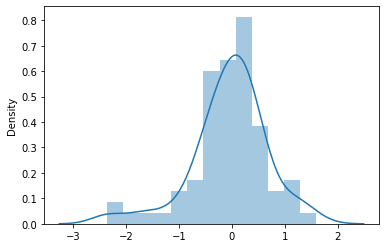

In [88]:
sns.distplot(y_pred-Y_test)

In [89]:
df_1 = pd.DataFrame(grid.cv_results_).set_index('rank_test_score').sort_index()

In [90]:
df_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_learning_rate,param_loss,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,
1,0.858635,0.005588,0.001587,0.001581,mae,0.25,lad,sqrt,"{'criterion': 'mae', 'learning_rate': 0.25, 'l...",-5.086957,0.271068,0.911803,0.737649,0.686385,-0.496010,2.305086
2,0.780252,0.005662,0.000895,0.000204,mae,0.25,lad,log2,"{'criterion': 'mae', 'learning_rate': 0.25, 'l...",-5.417622,0.338525,0.898219,0.689276,0.671284,-0.564063,2.433389
3,0.333808,0.006283,0.000730,0.000019,friedman_mse,0.5,huber,log2,"{'criterion': 'friedman_mse', 'learning_rate':...",-6.062989,0.285951,0.922136,0.722274,0.793898,-0.667746,2.706085
4,0.077903,0.001864,0.000828,0.000190,friedman_mse,0.5,ls,sqrt,"{'criterion': 'friedman_mse', 'learning_rate':...",-6.190346,0.263164,0.924662,0.814184,0.730513,-0.691565,2.758618
5,0.599783,0.080960,0.001436,0.000789,friedman_mse,0.25,ls,auto,"{'criterion': 'friedman_mse', 'learning_rate':...",-6.793149,0.441705,0.978368,0.928798,0.925962,-0.703663,3.051018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,5.024767,0.450358,0.000800,0.000114,mae,0.25,quantile,auto,"{'criterion': 'mae', 'learning_rate': 0.25, 'l...",-6.233270,-41.313617,0.574301,0.881874,-1.405959,-9.499334,16.109414
141,0.209847,0.038240,0.000757,0.000152,friedman_mse,1,quantile,log2,"{'criterion': 'friedman_mse', 'learning_rate':...",-51.818673,-0.568871,0.658513,0.447502,0.068393,-10.242627,20.792210
142,0.499058,0.006548,0.000666,0.000024,mse,0.05,quantile,auto,"{'criterion': 'mse', 'learning_rate': 0.05, 'l...",-38.570919,-18.732819,0.979511,0.927306,0.899642,-10.899456,15.794127


In [91]:

# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

Ridge Regularization and LR Hyperparameter Tuning

In [92]:
search = GridSearchCV(Ridge(), space, n_jobs=-1)
model = search.fit(X_sc,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [93]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'alpha': 1e-05, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'} 

Ridge(alpha=1e-05, normalize=True, solver='lsqr') 



In [94]:
df_1 = pd.DataFrame(search.cv_results_).set_index('rank_test_score').sort_index()

In [95]:
df_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,param_normalize,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,
1,0.006788,0.001959,0.000621,0.000027,0.00001,True,True,lsqr,"{'alpha': 1e-05, 'fit_intercept': True, 'norma...",0.991094,0.970989,0.987876,0.967804,0.959860,0.975525,0.012004
2,0.004307,0.000134,0.000462,0.000016,0.0001,True,True,lsqr,"{'alpha': 0.0001, 'fit_intercept': True, 'norm...",0.991112,0.971084,0.987978,0.967735,0.959627,0.975507,0.012093
3,0.004095,0.000603,0.000456,0.000028,0.1,True,False,lsqr,"{'alpha': 0.1, 'fit_intercept': True, 'normali...",0.991005,0.971189,0.988075,0.967518,0.959416,0.975440,0.012161
4,0.005051,0.000496,0.000569,0.000062,0.01,True,False,lsqr,"{'alpha': 0.01, 'fit_intercept': True, 'normal...",0.991147,0.971041,0.987892,0.965970,0.959972,0.975204,0.012246
5,0.004135,0.000188,0.000447,0.000009,0.001,True,False,lsqr,"{'alpha': 0.001, 'fit_intercept': True, 'norma...",0.991138,0.971015,0.987866,0.965901,0.960017,0.975187,0.012239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.002846,0.000052,0.000459,0.000016,0.0001,False,True,svd,"{'alpha': 0.0001, 'fit_intercept': False, 'nor...",-4100.781891,-1781.219606,-399.070229,-1909.716621,-5595.882700,-2757.334209,1849.046971
125,0.005276,0.004241,0.000516,0.000027,0.00001,False,False,svd,"{'alpha': 1e-05, 'fit_intercept': False, 'norm...",-4102.550332,-1782.023122,-399.125940,-1910.365918,-5598.326772,-2758.478417,1849.895773
125,0.003542,0.001075,0.000491,0.000024,0.00001,False,True,svd,"{'alpha': 1e-05, 'fit_intercept': False, 'norm...",-4102.550332,-1782.023122,-399.125940,-1910.365918,-5598.326772,-2758.478417,1849.895773


Lasso Regularization and LR Hyperparameter Tuning

In [96]:
# define search space
space = dict()
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

In [97]:
search = GridSearchCV(Lasso(), space, n_jobs=-1)
model = search.fit(X_sc,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [98]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [99]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'alpha': 0.001, 'fit_intercept': True, 'normalize': True} 

Lasso(alpha=0.001, normalize=True) 



In [100]:
df_1 = pd.DataFrame(search.cv_results_).set_index('rank_test_score').sort_index()
df_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,
1,0.013482,0.000982,0.000669,0.000043,0.001,True,True,"{'alpha': 0.001, 'fit_intercept': True, 'norma...",0.990270,0.974171,0.988208,0.963092,0.956220,0.974392,0.013424
2,0.014149,0.003086,0.000662,0.000048,0.01,True,False,"{'alpha': 0.01, 'fit_intercept': True, 'normal...",0.989736,0.973603,0.988201,0.962510,0.956392,0.974088,0.013353
3,0.021722,0.000437,0.001213,0.001042,0.0001,True,True,"{'alpha': 0.0001, 'fit_intercept': True, 'norm...",0.989930,0.970741,0.988699,0.966697,0.952119,0.973637,0.014226
4,0.026951,0.007903,0.000731,0.000100,0.001,True,False,"{'alpha': 0.001, 'fit_intercept': True, 'norma...",0.990511,0.970488,0.988151,0.965432,0.951167,0.973150,0.014672
5,0.010841,0.004837,0.000694,0.000185,0.1,True,False,"{'alpha': 0.1, 'fit_intercept': True, 'normali...",0.980444,0.974588,0.988206,0.962981,0.956923,0.972628,0.011378
6,0.027532,0.003299,0.001159,0.000816,0.00001,True,True,"{'alpha': 1e-05, 'fit_intercept': True, 'norma...",0.990773,0.969318,0.988230,0.964154,0.950575,0.972610,0.015111
7,0.023307,0.000867,0.000670,0.000030,0.0001,True,False,"{'alpha': 0.0001, 'fit_intercept': True, 'norm...",0.990725,0.969162,0.988239,0.963923,0.950391,0.972488,0.015188
8,0.022792,0.000545,0.000631,0.000020,0.00001,True,False,"{'alpha': 1e-05, 'fit_intercept': True, 'norma...",0.990616,0.969002,0.988249,0.963665,0.950130,0.972333,0.015276
9,0.008360,0.001810,0.000602,0.000022,0.01,True,True,"{'alpha': 0.01, 'fit_intercept': True, 'normal...",0.973260,0.973689,0.987721,0.960085,0.956568,0.970265,0.011105


Linear Regression Hyperparameter Tuning

In [101]:
# define search space
space = dict()
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

In [102]:
search = GridSearchCV(LinearRegression(), space, n_jobs=-1)
model = search.fit(X_sc,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [103]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'fit_intercept': True, 'normalize': True} 

LinearRegression(normalize=True) 



In [104]:
df_1 = pd.DataFrame(search.cv_results_).set_index('rank_test_score').sort_index()
df_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,
1,0.006210,0.003323,0.000537,0.000061,True,True,"{'fit_intercept': True, 'normalize': True}",0.988205,0.967072,0.988180,0.966125,0.960889,0.974094,0.011702
1,0.004100,0.002478,0.000737,0.000266,True,False,"{'fit_intercept': True, 'normalize': False}",0.988205,0.967072,0.988180,0.966125,0.960889,0.974094,0.011702
3,0.002298,0.000082,0.000514,0.000033,False,True,"{'fit_intercept': False, 'normalize': True}",-4102.755525,-1782.116515,-399.132296,-1910.440322,-5598.618131,-2758.612558,1849.996743
3,0.002061,0.000287,0.000440,0.000086,False,False,"{'fit_intercept': False, 'normalize': False}",-4102.755525,-1782.116515,-399.132296,-1910.440322,-5598.618131,-2758.612558,1849.996743


In [105]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Decision Tree Regressor Hyperparameter Tuning

In [106]:
# define search space
space = dict()
space['criterion'] = ['friedman_mse', 'mse', 'mae']
space['max_depth'] = [3,7,11,15,20]
space['max_features'] = ['auto', 'sqrt', 'log2']

In [107]:
search = GridSearchCV(DecisionTreeRegressor(), space, n_jobs=-1)
model = search.fit(X_sc,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


In [108]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'criterion': 'mae', 'max_depth': 7, 'max_features': 'auto'} 

DecisionTreeRegressor(criterion='mae', max_depth=7, max_features='auto') 



In [109]:
df_1 = pd.DataFrame(search.cv_results_).set_index('rank_test_score').sort_index()
df_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,
1,0.103506,0.010194,0.000726,0.000027,mae,7,auto,"{'criterion': 'mae', 'max_depth': 7, 'max_feat...",-6.039263,0.452827,0.969283,0.902177,0.894091,-0.564177,2.743688
2,0.015756,0.002770,0.000713,0.000085,friedman_mse,7,auto,"{'criterion': 'friedman_mse', 'max_depth': 7, ...",-6.042921,0.108865,0.964641,0.913900,0.869762,-0.637151,2.721072
3,0.021236,0.005063,0.000843,0.000187,mse,15,auto,"{'criterion': 'mse', 'max_depth': 15, 'max_fea...",-6.516954,0.305174,0.965296,0.920954,0.821079,-0.700890,2.917592
4,0.022380,0.011010,0.001555,0.001619,mse,11,auto,"{'criterion': 'mse', 'max_depth': 11, 'max_fea...",-6.518560,0.307703,0.957016,0.919240,0.799176,-0.707085,2.914997
5,0.014923,0.001623,0.000652,0.000028,mae,7,sqrt,"{'criterion': 'mae', 'max_depth': 7, 'max_feat...",-6.039699,0.389198,0.858679,0.550984,0.606685,-0.726830,2.660714
6,0.117228,0.009355,0.000669,0.000020,mae,15,auto,"{'criterion': 'mae', 'max_depth': 15, 'max_fea...",-6.621134,0.285174,0.967161,0.896900,0.796910,-0.734998,2.952779
7,0.004091,0.002530,0.000696,0.000222,mse,11,log2,"{'criterion': 'mse', 'max_depth': 11, 'max_fea...",-6.070108,0.183516,0.854906,0.747933,0.515261,-0.753698,2.668159
8,0.002799,0.000066,0.000522,0.000034,mse,15,log2,"{'criterion': 'mse', 'max_depth': 15, 'max_fea...",-6.243158,0.277163,0.867649,0.633920,0.592662,-0.774353,2.740863
9,0.015160,0.001713,0.000653,0.000067,mae,20,log2,"{'criterion': 'mae', 'max_depth': 20, 'max_fea...",-5.998576,0.160301,0.753946,0.708028,0.458500,-0.783560,2.616056


Random Forest Regressor Hyperparameter Tuning

In [110]:
# define search space
space = dict()
space['criterion'] = ['friedman_mse', 'mse', 'mae']
space['max_depth'] = [3,7,11,15,20]
space['max_features'] = ['auto', 'sqrt', 'log2']
space['n_estimators'] = [5,10,15,20,25]

In [111]:
search = GridSearchCV(RandomForestRegressor(), space, n_jobs=-1)
model = search.fit(X_sc,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


In [112]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'criterion': 'mae', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 10} 

RandomForestRegressor(criterion='mae', max_depth=11, n_estimators=10) 

